<a href="https://colab.research.google.com/github/Safayatcc20/Placement_logistice_Regression/blob/main/End_to_End_Toy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/placement.csv')
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [ ]:
df.head() # using this we get overview of my dataset

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape# it shows the size of dataset

(100, 4)

In [ ]:
#Steps
#0. Preprocess + EDA + Feature Selection
#1. Extract input and output
#2. Scale the values
#3. Train Test split
#4. Train the model
#5. Evaluate the model/model selection
#6. Deploy the model

In [ ]:
df.info()#find the missing is present or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head() # done preprocessing

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
import matplotlib.pyplot as plt
 #Start EDA

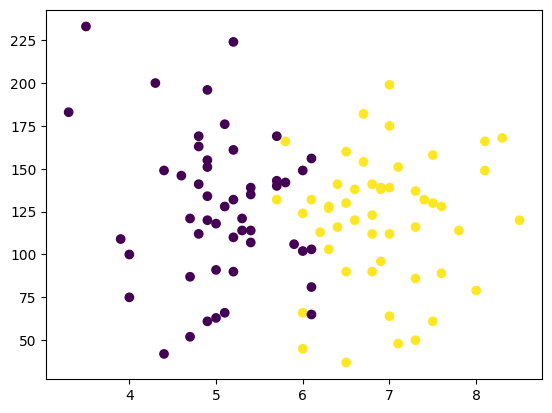

In [ ]:
plt.scatter(df['cgpa'],df['iq'], c = df['placement'])
# here yellow color shows the student are placement
#EDA give an idea for which model is used like here Logistic Regression model used
#more suitable due to split data in two side with linearly

Extract Input and Output

In [ ]:


#independent cgpa and iq
x = df.iloc[:, 0:2]
#dependent placement
y = df.iloc[:,-1]

In [ ]:
x.shape


(100, 2)

In [ ]:
y.shape

(100,)

**Train test split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1)

In [ ]:
x_train

,cgpa,iq
14,6.1,103.0
1,5.9,106.0
93,6.8,112.0
24,4.7,121.0
31,3.9,109.0
...,...,...
46,5.3,114.0
71,6.1,132.0
42,7.6,89.0
29,7.0,112.0


In [ ]:
y_train

,placement
14,0
1,0
93,1
24,0
31,0
...,...
46,0
71,1
42,1
29,1


In [ ]:
x_test

,cgpa,iq
69,8.5,120.0
49,5.4,135.0
43,6.8,141.0
3,7.4,132.0
18,4.0,100.0
75,4.8,169.0
83,7.5,130.0
97,6.7,182.0
50,3.5,233.0
96,4.4,42.0


In [ ]:
y_test

,placement
69,1
49,0
43,1
3,1
18,0
75,0
83,1
97,1
50,0
96,0


**Scaling the values**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train

array([[ 9.23081074e-02, -4.93455061e-01],
       [-9.43824469e-02, -4.15266759e-01],
       [ 7.45725048e-01, -2.58890155e-01],
       [-1.21452577e+00, -2.43252495e-02],
       [-1.96128799e+00, -3.37078457e-01],
       [ 5.59034493e-01, -5.03880168e-02],
       [-2.52135965e+00,  1.59156632e+00],
       [-5.61108833e-01,  4.44804562e-01],
       [ 1.21245143e+00, -1.54639086e-01],
       [-1.02783522e+00, -1.58809129e+00],
       [-2.81073001e-01,  5.49055631e-01],
       [-1.03716975e-03, -2.00509557e+00],
       [ 9.32415602e-01,  2.00857060e+00],
       [-1.21452577e+00, -9.10459338e-01],
       [ 9.32415602e-01,  4.44804562e-01],
       [-2.81073001e-01,  1.22668758e+00],
       [ 9.23081074e-02, -1.48384022e+00],
       [ 1.02576088e+00,  7.57557770e-01],
       [ 4.65689216e-01,  2.10239656e-01],
       [-7.47799387e-01, -3.11015690e-01],
       [-1.58790688e+00,  2.03463337e+00],
       [ 1.39914199e+00, -1.58809129e+00],
       [-1.02783522e+00,  7.57557770e-01],
       [-5.

In [ ]:
x_test

array([[ 2.33259476, -0.05038802],
       [-0.56110883,  0.34055349],
       [ 0.74572505,  0.4969301 ],
       [ 1.30579671,  0.26236519],
       [-1.86794271, -0.57164336],
       [-1.1211805 ,  1.22668758],
       [ 1.39914199,  0.21023966],
       [ 0.65237977,  1.56550356],
       [-2.3346691 ,  2.89470469],
       [-1.4945616 , -2.08328387]])

**Train the model**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()# object of logistic Regression(LR)
model.fit(x_train, y_train)# model training

LogisticRegression()

**Model Evaluate**

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_test

,placement
69,1
49,0
43,1
3,1
18,0
75,0
83,1
97,1
50,0
96,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

<Axes: >

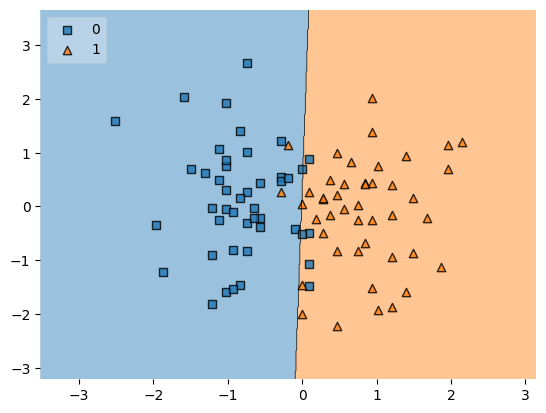

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values, clf = model,legend=2)

**Deploy model**

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('model.pkl', 'wb'))#wb = write binary mode